<h1>Импорт библиотек

In [62]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [63]:
import pytest
import numpy as np
import matplotlib.pyplot as plt

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Your code goes here

    if len(X) != len(V):
        raise ValueError("Количество матриц и векторов различно")
    
    res = np.zeros_like(V[0])

    for matrix, vector in zip(X, V):
        res += matrix @ vector
    return res


def test_sum_prod():
    M1 = np.array([[1, 2], [3, 4]])
    M2 = np.array([[0, 1], [1, 0]])
    v1 = np.array([[1], [0]])
    v2 = np.array([[0], [1]])

    res = M1 @ v1 + M2 @ v2
    np.testing.assert_array_equal(sum_prod([M1, M2], [v1, v2]), res)

    M1 = np.zeros((3,3))
    M2 = np.zeros((3,3))
    v1 = np.zeros((3,1))
    v2 = np.zeros((3,1))

    res = M1 @ v1 + M2 @ v2
    np.testing.assert_array_equal(sum_prod([M1, M2], [v1, v2]), res)

   


def test_mismatched_lengths():
    M1 = np.zeros((2,2))
    v1 = np.zeros((3,1))
    v2 = np.zeros((3,1))
    with pytest.raises(ValueError):
        sum_prod([M1], [v1, v2])

test_mismatched_lengths()
test_sum_prod()

    



<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [64]:
import numpy as np


def binarize(M, threshold=0.5):
    # Your code goes here
    return (M > threshold).astype(int)


def test_binarize():
    M = np.array([[1, 5], [3, 4]])
    threshold = 2
    res = np.array([[0, 1], [1, 1]])
    np.testing.assert_array_equal(binarize(M, threshold), res)

    M = np.array([[0.2, 0.75], [0.5, 4]])
    res = np.array([[0, 1], [0, 1]])
    np.testing.assert_array_equal(binarize(M), res)

    M = np.array([[10, 5], [3, 4]])
    threshold = 2
    res = np.array([[1, 1], [1, 1]])
    np.testing.assert_array_equal(binarize(M, threshold), res)

    M = np.array([[1, 5], [3, 4]])
    threshold = 9
    res = np.array([[0, 0], [0, 0]])
    np.testing.assert_array_equal(binarize(M, threshold), res)

    M = np.array([[]])
    threshold = 2
    res = np.array([[]])
    np.testing.assert_array_equal(binarize(M, threshold), res)


test_binarize()

    




<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [65]:
import numpy as np

def unique_rows(mat):
    # Your code goes here
    return [np.unique(row).tolist() for row in mat] 

def unique_columns(mat):
    # Your code goes here
    return [np.unique(mat[:, col]).tolist() for col in range(mat.shape[1])]

def test_uniq_rows_columns():
    M = np.array([
        [1, 2, 2],
        [3, 3, 3],
        [4, 5, 4]
    ])
    res = [
        [1, 2],
        [3],
        [4, 5]
    ]
    assert(unique_rows(M) == res)

    M = np.array([
        [1, 3, 2],
        [1, 3, 2],
        [4, 5, 2]
    ])
    res = [
        [1, 4],
        [3, 5],
        [2]
    ]
    assert(unique_columns(M) == res)

    M = np.array([[]])
    assert(unique_rows(M) == [[]])
    assert(unique_columns(M) == [])

    M = np.array([
        [1, 3, 2, 1]
    ])
    res_col = [
        [1],
        [3],
        [2],
        [1]
    ]
    res_row = [[1, 2, 3]]
    assert(unique_columns(M) == res_col)
    assert(unique_rows(M) == res_row)

test_uniq_rows_columns()


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]]
Мат ожтдание по строкам - [ 0.63229206  0.4695893  -0.21401545], Дисперсия - [0.35144734 0.57761516 0.19080683]
Мат ожтдание по столбцам - [-0.0689712   0.0567196   0.58782789  0.60824494], Дисперсия - [0.16922929 0.1195524  0.69718155 0.67186482]


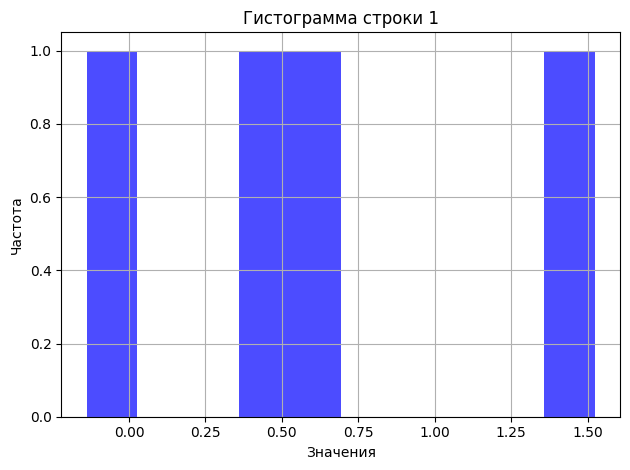

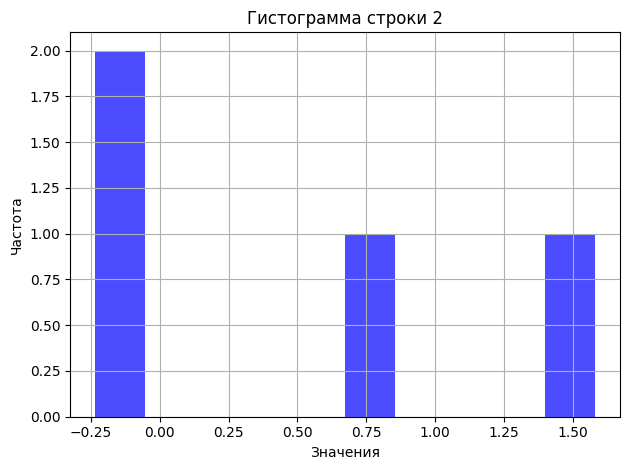

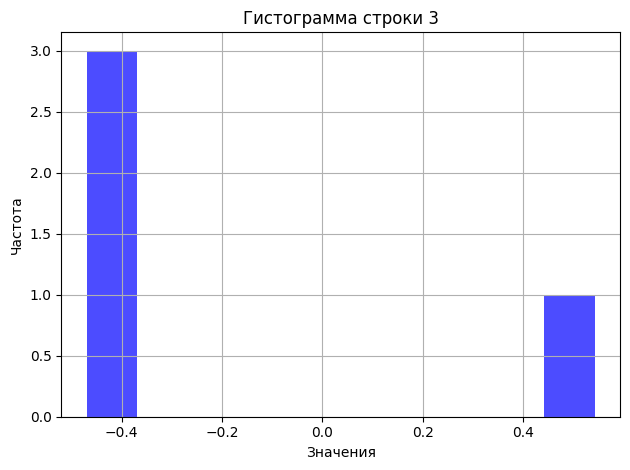

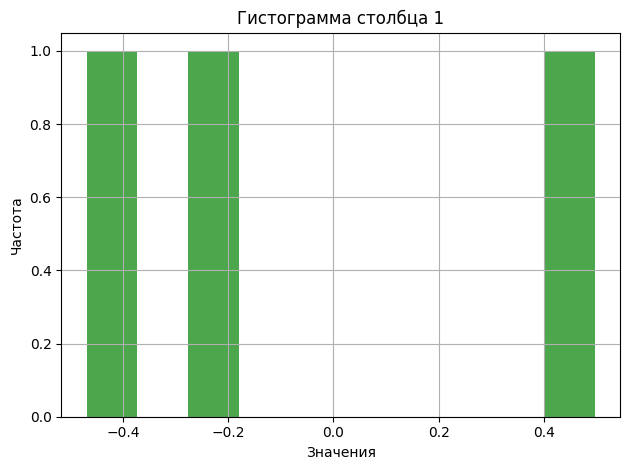

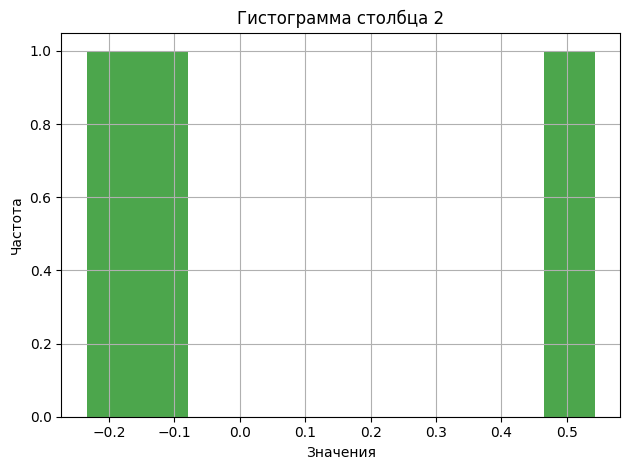

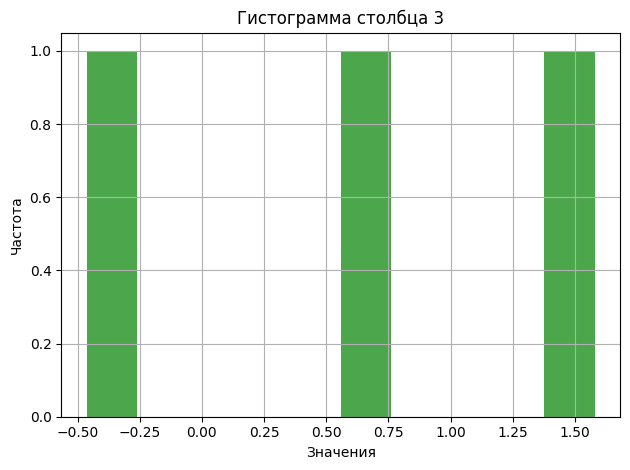

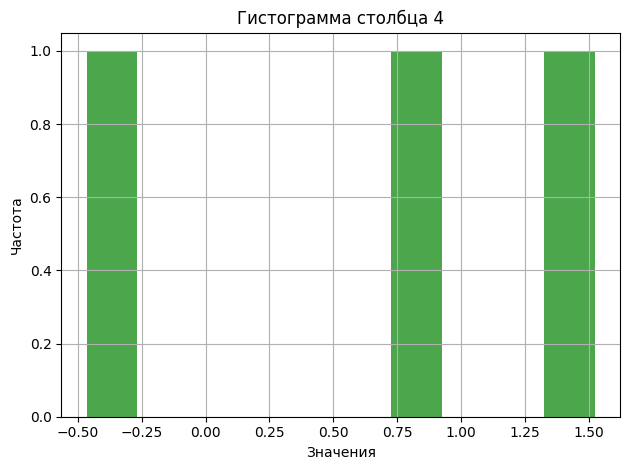

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def normal_matrix(m, n, me = 0, sigma = 1, seed = None):
    if seed is not None:
        np.random.seed(seed)
    matrix = np.random.normal(loc= me, scale = sigma, size = (m,n))
    print(matrix)

    row_means = np.mean(matrix, axis=1)
    row_variance = np.var(matrix, axis=1)
    print(f"Мат ожтдание по строкам - {row_means}, Дисперсия - {row_variance}")

    col_means = np.mean(matrix, axis=0)
    col_variance = np.var(matrix, axis=0)
    print(f"Мат ожтдание по столбцам - {col_means}, Дисперсия - {col_variance}")

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, alpha=0.7, color='blue')
        plt.title(f"Гистограмма строки {i + 1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green')
        plt.title(f"Гистограмма столбца {j + 1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

normal_matrix(3, 4, 0, 1, 42)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [67]:
def chess(m, n, a, b):
    # Your code goes here
    i_id, j_id = np.indices((m, n))
    chess = (i_id + j_id) % 2 == 0
    res = np.where(chess, a, b)
    return res

def test_chess():
    res = chess(2,2,1,0)
    exp = np.array([
        [1, 0],
        [0, 1]
    ])
    np.testing.assert_array_equal(res, exp)

    res = chess(3,3,'A','0')
    exp = np.array([
        ['A', '0', 'A'],
        ['0', 'A', '0'],
        ['A', '0', 'A']
    ])
    np.testing.assert_array_equal(res, exp)

    res = chess(1, 5, 1, 0)
    exp = np.array([[1, 0, 1, 0, 1]])
    np.testing.assert_array_equal(res, exp)

    res = chess(5, 1, 1, 0)
    exp = np.array([[1], [0], [1], [0], [1]])
    np.testing.assert_array_equal(res, exp)

    res = chess(0, 0, 1, 0)
    exp = np.array([]).reshape(0,0)
    np.testing.assert_array_equal(res, exp)

test_chess()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

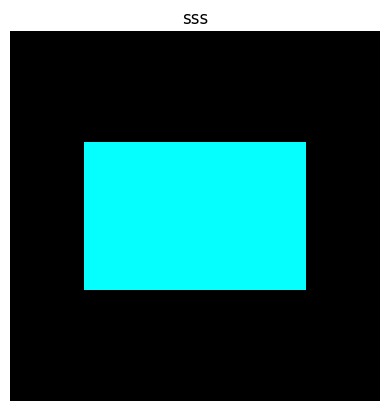

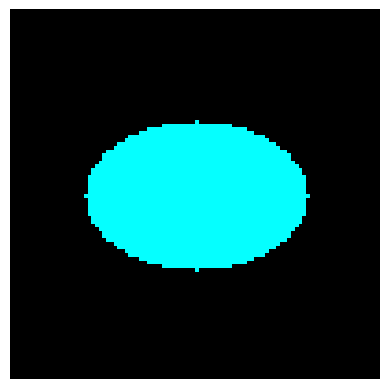

In [68]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Your code goes here
    background =  np.ones((m, n, 3), dtype = np.int32)
    background[:] = background_color

    x0, y0 = n // 2, m // 2

    top = max(0, y0 - a // 2)
    bottom = min(m, y0 + a // 2 + a % 2)
    left = max(0, x0 - b // 2)
    right  = min(n, x0 + b // 2 + b % 2)

    background[top:bottom, left:right] = rectangle_color

    return background

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Your code goes here
    background =  np.ones((m, n, 3), dtype = np.int32)
    background[:] = background_color

    x0, y0 = n // 2, m // 2
    y, x = np.ogrid[:m, :n]

    el = ((x - x0) ** 2 / b ** 2 + (y - y0) ** 2 / a ** 2) <= 1

    for i in range(3):
        background[:, :, i][el] = ellipse_color[i]
    return background

def show_image(image, title="Image"):
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

figur_color = (5.0, 255.0, 255.0)
background_color = (0.0, 0.0, 0.0)
img = draw_rectangle(40, 60, 100, 100, figur_color, background_color)
img2 = draw_ellipse(20, 30, 100, 100, figur_color, background_color)
show_image(img,'sss')
show_image(img2,'')

def test_draw():
    figur_color = (2, 2, 2)
    background_color = (77, 77, 77)
    img = draw_rectangle(40, 60, 100, 100, figur_color, background_color)

    assert(np.allclose(img[50, 50], figur_color))
    assert(np.allclose(img[0, 0], background_color))

    img = draw_ellipse(30, 40, 100, 100, figur_color, background_color)

    assert(np.allclose(img[50, 50], figur_color))
    assert(np.allclose(img[0, 0], background_color))

    img = draw_rectangle(100, 100, 50, 50, figur_color, background_color)

    assert(np.allclose(img, figur_color))

    img = draw_ellipse(100, 100, 50, 50, figur_color, background_color)

    assert(np.allclose(img, figur_color))


test_draw()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [69]:
def time_series(series, p):
    n = len(series)
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)

    local_maxima = []
    local_minima = []

    for i in range(1, n - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            local_maxima.append((i, series[i]))
        if series[i] <  series[i - 1] and series[i] < series[i + 1]:
            local_minima.append((i, series[i]))
    move_avg = [np.mean(series[i:i + p]) for i in range(n - p + 1)]

    return {
        "maen": mean,
        "variance": variance,
        "mstd_devaen": std_dev,
        "local_maxima": local_maxima,
        "local_minima": local_minima,
        "move_avg": move_avg
    }

series = [1, 3, 2, 5, 4, 6, 3, 4, 2, 1]
p = 3

result = time_series(series, p)

for key, value in result.items():
    print(f"{key}: {value}")

maen: 3.1
variance: 2.49
mstd_devaen: 1.57797338380595
local_maxima: [(1, 3), (3, 5), (5, 6), (7, 4)]
local_minima: [(2, 2), (4, 4), (6, 3)]
move_avg: [np.float64(2.0), np.float64(3.3333333333333335), np.float64(3.6666666666666665), np.float64(5.0), np.float64(4.333333333333333), np.float64(4.333333333333333), np.float64(3.0), np.float64(2.3333333333333335)]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [70]:
def one_hot_encode(marks):
    marks = np.array(marks)
    classes_count = marks.max() + 1
    return np.eye(classes_count)[marks]

v = [0, 2, 3, 0]

print(one_hot_encode(v))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
